# Co2 emission prediction

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Reading data

In [2]:
dataFrame = pd.read_csv("CO2 Emissions_Canada.csv")

## Data processing

In [3]:
dataFrame["Fuel Type"] = dataFrame["Fuel Type"].replace("Z", "Premium gasoline")
dataFrame["Fuel Type"] = dataFrame["Fuel Type"].replace("D", "Diesel")
dataFrame["Fuel Type"] = dataFrame["Fuel Type"].replace("X", "Regular gasoline")
dataFrame["Fuel Type"] = dataFrame["Fuel Type"].replace("E", "Ethanol (E85)")
dataFrame["Fuel Type"] = dataFrame["Fuel Type"].replace("N", "Natural gas")

## Data visualision

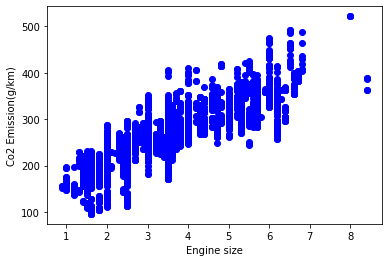

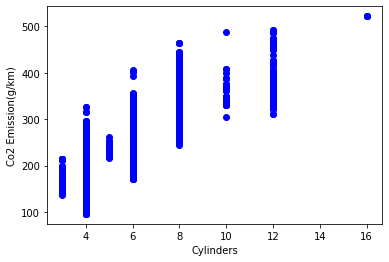

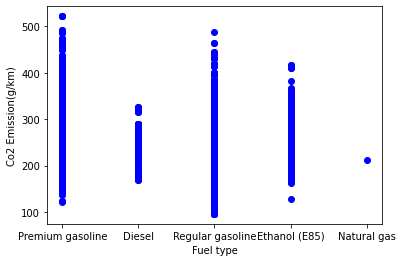

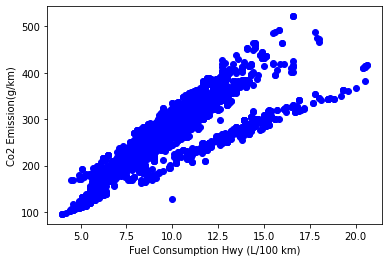

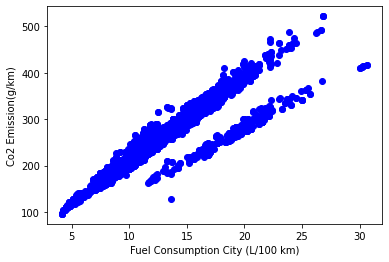

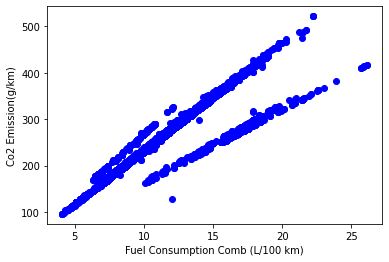

In [4]:
plt.scatter(dataFrame["Engine Size(L)"], dataFrame["CO2 Emissions(g/km)"],  color="blue")
plt.xlabel("Engine size")
plt.ylabel("Co2 Emission(g/km)")
plt.show()

plt.scatter(dataFrame["Cylinders"], dataFrame["CO2 Emissions(g/km)"],  color="blue")
plt.xlabel("Cylinders")
plt.ylabel("Co2 Emission(g/km)")
plt.show()

plt.scatter(dataFrame["Fuel Type"], dataFrame["CO2 Emissions(g/km)"],  color="blue")
plt.xlabel("Fuel type")
plt.ylabel("Co2 Emission(g/km)")
plt.show()

plt.scatter(dataFrame["Fuel Consumption Hwy (L/100 km)"], dataFrame["CO2 Emissions(g/km)"],  color="blue")
plt.xlabel("Fuel Consumption Hwy (L/100 km)")
plt.ylabel("Co2 Emission(g/km)")
plt.show()

plt.scatter(dataFrame["Fuel Consumption City (L/100 km)"], dataFrame["CO2 Emissions(g/km)"],  color="blue")
plt.xlabel("Fuel Consumption City (L/100 km)")
plt.ylabel("Co2 Emission(g/km)")
plt.show()

plt.scatter(dataFrame["Fuel Consumption Comb (L/100 km)"], dataFrame["CO2 Emissions(g/km)"],  color="blue")
plt.xlabel("Fuel Consumption Comb (L/100 km)")
plt.ylabel("Co2 Emission(g/km)")
plt.show()

## Finding the best "random state" and making the regression model

In [5]:
x = dataFrame[["Engine Size(L)", "Cylinders", "Fuel Consumption Comb (L/100 km)"]]
y = dataFrame[["CO2 Emissions(g/km)"]]

r2 = {}
for num in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state= num)

    lR = LinearRegression()
    lR.fit(X_train, y_train)
    y_hat = lR.predict(X_test)

    r2.update({f"{num}": r2_score(y_test,y_hat)})
    
r2 = {k: v for k,v in r2.items() if v==max(r2.values())}
accuracy = list(r2.values())[0]*100
accuracy = round(accuracy,2)
best_random_state = list(r2.keys())[0]
print(f"The best random_state is {best_random_state} with {accuracy} percent accuracy")

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size= 0.8, random_state= 17)#17 is the best random state
LR = LinearRegression()
LR.fit(X_train, y_train)

The best random_state is 17 with 89.35 percent accuracy


LinearRegression()

## Prediction

In [6]:
ES = input("Enter the engine size (Liter)=> ")
CS = input("Enter the Cylinders count => ")
FC = input("Enter the fuel consumption (L/100 km) => ")
user_data = {
    "Engine Size(L)" : ES,
    "Cylinders" : CS,
    "Fuel Consumption Comb (L/100 km)" : FC
}
user_data = pd.DataFrame(user_data, index=[0])
y_predict = LR.predict(user_data)
y_predict = y_predict[0][0]
y_predict = round(y_predict,2)
print(f"Your predicted Co2 emission value is {y_predict} with {accuracy} percent accuracy")

Enter the engine size (Liter)=> 2
Enter the Cylinders count => 4
Enter the fuel consumption (L/100 km) => 8.5
Your predicted Co2 emission value is 201.0 with 89.35 percent accuracy
